In [1]:
# import tensorflow as tf
import keras

Using TensorFlow backend.


In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Predictions with Deep Learning models/Churn Modeling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [6]:
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [7]:
train_sample_final = pd.concat([x, geography, gender], axis=1)
train_sample_final = train_sample_final.drop(['Geography', 'Gender'], axis=1)
train_sample_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
x_train, x_test, y_train, y_test = train_test_split(train_sample_final, y, test_size=0.2, random_state = 0)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
x_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [29]:
model = Sequential([Dense(6, input_dim=11, activation='relu', kernel_initializer = 'he_uniform'), Dropout(0.3), 
                    Dense(6, activation='relu', kernel_initializer = 'he_uniform'),Dropout(0.3), 
                    Dense(1, activation='sigmoid', kernel_initializer = 'glorot_uniform')])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])

In [32]:
model_history = model.fit(x_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
8000/8000 [==============================] - 5s 655us/step - loss: 0.7411 - accuracy: 0.6681
Epoch 2/20
8000/8000 [==============================] - 1s 83us/step - loss: 0.5526 - accuracy: 0.7629
Epoch 3/20
8000/8000 [==============================] - 1s 81us/step - loss: 0.5188 - accuracy: 0.7845
Epoch 4/20
8000/8000 [==============================] - 1s 88us/step - loss: 0.5028 - accuracy: 0.7916
Epoch 5/20
8000/8000 [==============================] - 1s 90us/step - loss: 0.4889 - accuracy: 0.7950
Epoch 6/20
8000/8000 [==============================] - 1s 82us/step - loss: 0.4887 - accuracy: 0.7934
Epoch 7/20
8000/8000 [==============================] - 1s 94us/step - loss: 0.4790 - accuracy: 0.7947
Epoch 8/20
8000/8000 [==============================] - 1s 90us/step - loss: 0.4692 - accuracy: 0.7955
Epoch 9/20
8000/8000 [==============================] - 1s 97us/step - loss: 0.4587 - accuracy: 0.7977
Epoch 10/20
8000/8000 [==============================] - 1s 88us/step - 

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred = y_pred>0.5

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8315
[[1587    8]
 [ 329   76]]


In [38]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy'])


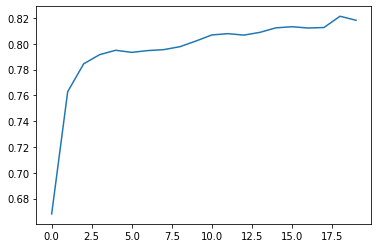

In [45]:
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])